# Regularization

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

Create data following $\sqrt{x}$ 

In [3]:
np.random.seed(13)

In [4]:
X = np.arange(1, 60, 5)
y = [np.sqrt(xi) + np.random.normal(0, 0.5) for xi in X]

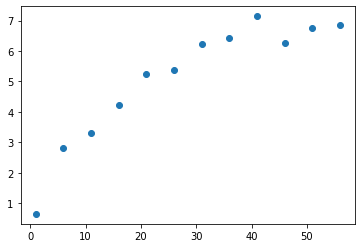

In [5]:
plt.scatter(X, y)

In [6]:
# Reshape
print(X.shape)
X = X.reshape(-1,1)
print(X.shape)

(12,)
(12, 1)


### Underfitting (high bias)

In [7]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [8]:
y_pred = model.predict(X)

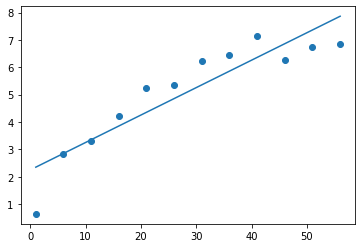

In [9]:
plt.scatter(X,y)
plt.plot(X,y_pred)

### Underfitting:

To see if you got an underfitting model, compare the scores:       
`model.score(X_train, y_train)`    
`model.score(X_test, y_test)`
     
If both scores are weak, you have probably an underfit situation
     
How could it happen?
 * Small data test 
 * Weak feature engineering
     * Too little features
     * Features uninformative

### Overfit

In [10]:
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly = PolynomialFeatures(degree=12)
X_poly = poly.fit_transform(X)

In [12]:
X_poly.shape

(12, 13)

In [13]:
model = LinearRegression()
model.fit(X_poly,y)
y_pred_poly = model.predict(X_poly)

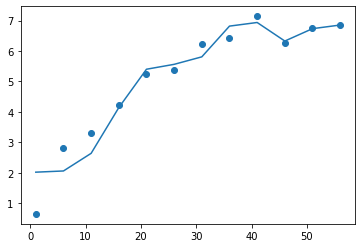

In [14]:
plt.scatter(X,y)
plt.plot(X,y_pred_poly)

### Overfitting: 
To see if you got an overfitting model, compare the scores:     
 `model.score(X_train, y_train)`    
 `model.score(X_test, y_test)`
     
If the train score is exceptionally good and the test score is weak, you probably have an overfit situation

In [15]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [16]:
lasso = Lasso()
ridge = Ridge()
elast = ElasticNet()

In [17]:
lasso.fit(X_poly, y)
ridge.fit(X_poly, y)
elast.fit(X_poly, y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.656e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.682e+00, tolerance: 4.352e-03
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

If the model does not converge, the gradient did not reduce under the set tolerance during the set maximal iteration steps. This can happen easily with regularization, still you can try the following:     
* increase `max_iter` (maybe some more steps help)
* increase `tol` (being more generous could help)   

Both measures should be taken carefully since it could increase the optimization time or make the results worst

In [18]:
y_lasso = lasso.predict(X_poly)
y_ridge = ridge.predict(X_poly)
y_elast = elast.predict(X_poly)

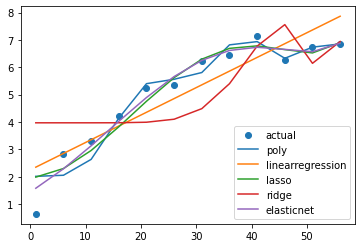

In [19]:
plt.scatter(X, y, label='actual')
plt.plot(X, y_pred_poly, label='poly')
plt.plot(X, y_pred, label='linearregression')
plt.plot(X, y_lasso, label='lasso')
plt.plot(X, y_ridge, label='ridge')
plt.plot(X, y_elast, label='elasticnet')
plt.legend()

In [20]:
lasso.coef_

array([ 0.00000000e+00,  0.00000000e+00,  1.00183764e-02, -1.67305516e-04,
       -5.47848250e-07,  2.08077729e-09,  7.57646149e-11,  1.22386284e-12,
        1.61795835e-14,  1.83142137e-16,  1.55305636e-18,  9.87958371e-22,
       -3.90062807e-22])